# 線形回帰

## モデル

**線形回帰**（linear regression）は、予測の目的変数$y$と特徴量（説明変数）$x_1, x_2, ..., x_d$の間に次のような線形関係を仮定したモデルを置いて予測する手法。
$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_d x_d + \varepsilon
$$

ここで$\beta_1, \beta_2, ..., \beta_d$は回帰係数と呼ばれるパラメータで、モデル内で推定される。$\varepsilon$はデータ取得時の測定誤差などの偶然による誤差を表し、次の3つの条件を満たす。

1. 期待値は0：$\text{E}[\varepsilon]=0$
2. 分散は一定: $\text{V}[\varepsilon]=\sigma^2$
3. 異なった誤差項は無相関: $j \neq i$ならば$Cov(\varepsilon_i, \varepsilon_j) = E(\varepsilon_i, \varepsilon_j) = 0$



サンプルサイズが$n$のデータセット$\{\boldsymbol{x}_i, y_i\}^n_{i=1}$があるとして、目的変数を$\boldsymbol{y} = (y_1, y_2, ..., y_n)^\top$、特徴量を$\boldsymbol{X}=(\boldsymbol{x}_1, \boldsymbol{x}_2, ..., \boldsymbol{x}_n)^\top$とおくと、このモデルは

$$
\boldsymbol{y}=\boldsymbol{X} \boldsymbol{\beta}+\boldsymbol{\varepsilon}
$$

と表記することができる。


## パラメータの推定

一般的に線形回帰ではパラメータの推定に**最小二乗法**（least squares method）という方法が使われる。

これは誤差関数$J( \boldsymbol{\beta})$を実測値$\boldsymbol{y}$と予測値$\hat{\boldsymbol{y}} = \boldsymbol{X}\hat{\boldsymbol{\beta}}$の二乗誤差の和（誤差二乗和 sum of squared error: SSE）

$$
J( \boldsymbol{\beta})
= ||\boldsymbol{y} -\boldsymbol{X}\hat{\boldsymbol{\beta}}||^2
= \sum^n_{i=1} (y_i - \hat{y}_i)^2 = \sum^n_{i=1} \varepsilon_i^2
= \boldsymbol{\varepsilon}^\top \boldsymbol{\varepsilon}
$$

として定義し、この二乗誤差を最小にするパラメータ（**最小二乗推定量** ordinary least square's estimator: OLSE）

$$
\newcommand{\argmin}{\mathop{\rm arg~min}\limits}
\hat{\boldsymbol{\beta}}^{LS} = \argmin_{\boldsymbol{\beta}}
\sum^n_{i=1} (y_i - \hat{y}_i)^2
$$


を採用するという方法。

二乗誤差$(y_i - \hat{y}_i)^2 = \varepsilon_i^2$はU字型になるため傾きがゼロになる点が最小値になる。そのため最小二乗法は解析的に解を求めることができる。


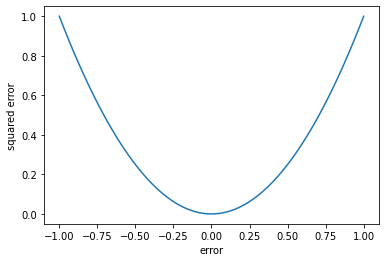

In [99]:
import matplotlib.pyplot as plt
import numpy as np

def square(error):
    return error ** 2

errors = np.linspace(-1, 1, 100)
squared_errors = [square(error) for error in errors]

fig, ax = plt.subplots()
ax.plot(errors, squared_errors)
_ = ax.set(xlabel='error', ylabel='squared error')

誤差二乗和は

$$
\begin{align}
\boldsymbol{\varepsilon}^\top \boldsymbol{\varepsilon}
&= (\boldsymbol{y} - \boldsymbol{X}\hat{\boldsymbol{\beta}})^\top (\boldsymbol{y} - \boldsymbol{X}\hat{\boldsymbol{\beta}})\\
&=\boldsymbol{y}^\top \boldsymbol{y}
- \boldsymbol{y}^\top\boldsymbol{X}\boldsymbol{\beta}
- (\boldsymbol{X}\boldsymbol{\beta})^\top\boldsymbol{y}
+ (\boldsymbol{X}\boldsymbol{\beta})^\top (\boldsymbol{X}\boldsymbol{\beta})\\
&= \boldsymbol{y}^\top \boldsymbol{y}
- 2 \boldsymbol{\beta}^\top \boldsymbol{X}^\top \boldsymbol{y}
+ \boldsymbol{\beta}^\top \boldsymbol{X}^\top 
\boldsymbol{X} \boldsymbol{\beta}\\
\end{align}
$$

```{margin}
※転置の基本公式から、$(\boldsymbol{X}\hat{\boldsymbol{\beta}})^\top=\hat{\boldsymbol{\beta}}^\top\boldsymbol{X}^\top$、$\boldsymbol{y}^\top\boldsymbol{X}\hat{\boldsymbol{\beta}}=(\boldsymbol{X}\hat{\boldsymbol{\beta}})^\top\boldsymbol{y}=\hat{\boldsymbol{\beta}}^\top\boldsymbol{X}^\top\boldsymbol{y}$
```

であるから、二乗誤差の傾きがゼロになる点は

$$
\frac{\partial \boldsymbol{\varepsilon}^\top \boldsymbol{\varepsilon}}{\partial \boldsymbol{\beta}}
= -2\boldsymbol{X}^\top\boldsymbol{y}
+ 2(\boldsymbol{X}^\top\boldsymbol{X})\boldsymbol{\beta}
=\boldsymbol{0}
$$

と表すことができる。

これを整理して

$$
2(\boldsymbol{X}^\top\boldsymbol{X}) \boldsymbol{\beta}
= 2\boldsymbol{X}^\top\boldsymbol{y}
$$

これの両辺を2で割ると（あるいは誤差関数の定義の際に$1/2$を掛けておくと）、**正規方程式**（normal equation）とよばれる次の式が得られる。

$$
(\boldsymbol{X}^\top\boldsymbol{X})\boldsymbol{\beta}
= \boldsymbol{X}^\top\boldsymbol{y}
$$

これを$\boldsymbol{\beta}$について解けば

$$
\boldsymbol{\beta} =
(\boldsymbol{X}^\top\boldsymbol{X})^{-1}
\boldsymbol{X}^\top\boldsymbol{y}
$$

となり、最小二乗推定量$\hat{\boldsymbol{\beta}}^{LS}$が得られる。


## 実装

numpyでは、行列やベクトルの積は`@`という演算子で書くことができる。そのため、

```python
import numpy as np
beta = np.linalg.inv(X.T @ X) @ X.T @ y
```

のように書けば上の式とおなじ演算を行うことができる。

### データの準備

乱数を発生させて架空のデータを作る。

$$
y = 10 + 3 x_1 + 5 x_2 + \varepsilon\\
x_1 \sim Uniform(0, 10)\\
x_2 \sim Normal(3, 1)\\
\varepsilon \sim Normal(0, 1)\\
$$

ここで$\varepsilon$は測定誤差などのランダムなノイズとする

In [64]:
import numpy as np
import pandas as pd
n = 100  # sample size

np.random.seed(0)
x0 = np.ones(shape=(n, ))
x1 = np.random.uniform(0, 10, size=n)
x2 = np.random.normal(3, 1, size=n)
noise = np.random.normal(size=n)

beta = [10, 3, 5]  # 真の回帰係数
y = beta[0] * x0 + beta[1] * x1 + beta[2] * x2 + noise 

特徴量$x$と目的変数$y$の関係を散布図で描くと次の図のようになった。

[Text(0.5, 0, 'x2'), Text(0, 0.5, 'y')]

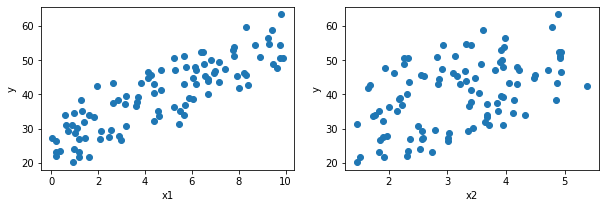

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
axes[0].scatter(x1, y)
axes[0].set(xlabel='x1', ylabel='y')
axes[1].scatter(x2, y)
axes[1].set(xlabel='x2', ylabel='y')

### 推定

これらのデータを使用して推定を行う。

In [98]:
X = np.array([x0, x1, x2]).T

# Xの冒頭5行は以下のようになっている
print(X[0:5])

[[1.         5.48813504 1.83485016]
 [1.         7.15189366 3.90082649]
 [1.         6.02763376 3.46566244]
 [1.         5.44883183 1.46375631]
 [1.         4.23654799 4.48825219]]


In [97]:
# 最小二乗法で推定
beta_ = np.linalg.inv(X.T @ X) @ X.T @ y

print(f"""
推定された回帰係数: {beta_.round(3)}
データ生成過程の係数: {beta}
""")


推定された回帰係数: [9.564 2.98  5.119]
データ生成過程の係数: [10, 3, 5]



真の値にそれなりに近い回帰係数が推定できた。

なお、scikit-learnに準拠したfit/predictのメソッドを持つ形でクラスとして定義するなら、以下のようになる（参考： [sklearn準拠モデルの作り方 - Qiita](https://qiita.com/roronya/items/fdf35d4f69ea62e1dd91)）。

In [70]:
# scikit-learnに準拠した形で実装
from sklearn.base import BaseEstimator, RegressorMixin


class LinearRegression(BaseEstimator, RegressorMixin):

    def fit(self, X, y):
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ y
        return self

    def predict(self, X):
        return X @ self.coef_


In [89]:
model = LinearRegression()
model.fit(X, y)
model.coef_

array([9.56372548, 2.97972446, 5.11931302])

### 予測してみる

root mean squared error (RMSE)

$$
RMSE = \sqrt{
  \frac{1}{N} \sum^N_{i=1} (y_i - \hat{y}_i)^2
}
$$

を使って予測値を評価してみる。

In [92]:
# 予測値を算出
y_pred = model.predict(X)

# 予測誤差を評価
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"RMSE: {rmse:.3f}")

RMSE: 0.972


予測値と実測値の散布図を描くと次のようになった。

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

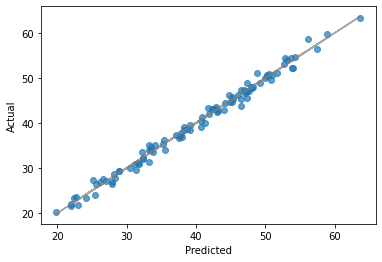

In [93]:
fig, ax = plt.subplots()
ax.plot(y_pred, y_pred, color='gray', alpha=.7)
ax.scatter(y_pred, y, alpha=.7)
_ = ax.set(xlabel='Predicted', ylabel='Actual')

## 最尤推定法に基づく正規方程式の導出



## 最小二乗推定量の性質

### 回帰係数のバイアスとバリアンス

最小二乗推定量はすべての線形不偏推定量の中で最もバリアンスが小さい（最良である）ことを示すガウス・マルコフの定理というものがある。

```{margin} バイアスとバリアンス
統計学・機械学習の分野では誤差をバイアス（bias）とバリアンス（variance）に分けて考えることが多い。

バイアスは真の値$\theta$とサンプルを変えて推定を繰り返したときの個々の推定結果の平均$E(\hat{\theta})$との差で、
バリアンスは推定の分散$V(\hat{\theta})$である。

$$
Bias = \theta - E(\hat{\theta})\\
Variance = V(\hat{\theta})
$$
```


```{note} ガウス・マルコフの定理
各$i$について、

- $E[\varepsilon_i] = 0$
- $V[\varepsilon_i]=\sigma^2 < \infty$ が共通
- $i \neq j$のとき$E[\varepsilon_i \varepsilon_j] = 0$

を満たすとき、最小二乗推定量$\hat{\beta}_{OLS}$はBLUEになる
```


#### 不偏性

任意のパラメータの線形結合$\theta=\boldsymbol{\alpha}^\top {\boldsymbol{\beta}}$を考える。例えば$f(x_0)=x_0^\top \beta$がこの形である。

この最小二乗推定値は

$$
\hat{\theta} = \boldsymbol{\alpha}^\top \hat{\boldsymbol{\beta}}
= \boldsymbol{\alpha}^\top (\boldsymbol{X}^\top \boldsymbol{X})^{-1} \boldsymbol{X}^\top \boldsymbol{y}
$$

で、期待値をとると

$$
\begin{align}
E[\hat{\theta}]
&= E[\boldsymbol{\alpha}^\top \hat{\boldsymbol{\beta}}]\\
&= E[\boldsymbol{\alpha}^\top (\boldsymbol{X}^\top \boldsymbol{X})^{-1} \boldsymbol{X}^\top \boldsymbol{y}]\\
% &= \boldsymbol{\alpha}^\top (\boldsymbol{X}^\top \boldsymbol{X})^{-1} \boldsymbol{X}^\top E[\boldsymbol{y}]\\
&= E[\boldsymbol{\alpha^\top (X^\top X)^{-1} X^\top (X\beta + \varepsilon) }] \\
&= \boldsymbol{\alpha^\top (X^\top X)^{-1} X^\top X \beta + \alpha^\top (X^\top X)^{-1} X^\top} E[ \varepsilon ] \\
&= \boldsymbol{\alpha^\top (X^\top X)^{-1} X^\top X \beta}\\
&= \boldsymbol{\alpha}^\top \boldsymbol{\beta}
\end{align}
$$

```{margin}
※誤差項は仮定により$E[\boldsymbol{\varepsilon}]=0$であるため
```

となり（※）、$\hat{\theta}$が不偏推定量である（$E[\hat{\theta}] = \theta$）ことがわかる。


#### バリアンス

$\boldsymbol{\alpha}^\top \boldsymbol{\beta}$に対して不偏のまた別の線形推定量$\boldsymbol{c}^\top \boldsymbol{y}$があるとする。

両者の差を

$$
\begin{align}
\boldsymbol{\alpha}^\top \boldsymbol{\hat{\beta}} - \boldsymbol{c}^\top \boldsymbol{y}
&= [ \boldsymbol{\alpha}^\top (\boldsymbol{X}^\top \boldsymbol{X})^{-1} \boldsymbol{X} - \boldsymbol{c}^\top ] \boldsymbol{y}\\
&=: \boldsymbol{d}^\top \boldsymbol{y}
\end{align}
$$

とおく。このとき、不偏性$E[\boldsymbol{c}^\top \boldsymbol{y}] = \boldsymbol{\alpha}^\top \boldsymbol{\beta}$から両者の差の期待値はゼロになるべきであり、

$$
E[\boldsymbol{d}^\top \boldsymbol{y}]
= \boldsymbol{d}^\top \boldsymbol{X} \boldsymbol{\beta} = 0
$$

が任意の$\boldsymbol{\beta}$について成り立たなければならないため、

$$
\boldsymbol{d}^\top \boldsymbol{X} = \boldsymbol{0}
$$

が成り立つ。


次に、2つの確率変数$X, Y$に対し

$$
V[X+Y] = V[X] + 2 \text{Cov}[X, Y] + V[Y]
$$

が成り立つから、$\boldsymbol{c}^\top \boldsymbol{y}$の分散は

$$
\begin{align}
V[\boldsymbol{c^\top y}] &= V[\boldsymbol{ \alpha^\top \hat{\beta} - d^\top y }]\\
&= V[\boldsymbol{ \alpha^\top \hat{\beta} }]
- 2 \text{Cov} [\boldsymbol{ \alpha^\top (X^\top X)^{-1} X^\top y }, \boldsymbol{ d^\top y} ]
+ V[\boldsymbol{ d^\top y}]
\end{align}
$$

と表すことができる。


$$
\text{Cov}(A, B) = E[(A - E[A])(B - E[B])^\top]
$$

$$
\text{Cov}(a^\top y, b^\top y)
= E[(a^\top y - E[a^\top y])(b^\top y - E[b^\top y])^\top]
$$

$$
\text{Cov}(a^\top y, b^\top y)
= E[(a^\top y - E[a^\top y])(b^\top y - E[b^\top y])^\top]\\
= E[(a^\top y - \alpha^\top \beta)(b^\top y - E[b^\top y])^\top]
$$

次に、2つの確率変数

$$
\boldsymbol{a^\top y} = \sum a_i y_i,
\hspace{2em}
\boldsymbol{b^\top y} = \sum b_i y_i
$$

の共分散は、誤差項$\boldsymbol{\varepsilon}$が無相関・等分散の仮定$V[\boldsymbol{\varepsilon}] = \sigma^2 \boldsymbol{I}$を満たすとき、

$$
\text{Cov}[\boldsymbol{a^\top y, b^\top y}]
= \text{Cov}[\boldsymbol{a^\top \varepsilon, b^\top \varepsilon}]
= \sum a_i b_i \sigma^2
= (\boldsymbol{a^\top b}) \sigma^2
$$

```{margin}
TODO: 解説書く
```

となることから

$$
\text{Cov}[\boldsymbol{ \alpha^\top (X^\top X)^{-1} X^\top y, d^\top y }]
= \boldsymbol{\alpha^\top (X^\top X)^{-1} X^\top d } \cdot \sigma^2
$$

となり、$\boldsymbol{d}^\top \boldsymbol{X} = \boldsymbol{0}$よりこれは0となる。

よって

$$
V[\boldsymbol{ c^\top y }] = V[\boldsymbol{ \alpha^\top \hat{\beta} }] + V[\boldsymbol{ d^\top y }]
$$

が成り立ち、分散は非負なので

$$
V[\boldsymbol{ c^\top y }] \geq V[\boldsymbol{ \alpha^\top \hat{\beta} }]
$$

を意味する。

よって$\boldsymbol{ \alpha^\top \hat{\beta} }$は最良線形不偏推定量BLUEである。

## 参考文献

- 東京大学出版会『統計学入門』
- 東京大学出版会『自然科学の統計学』
- Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman, J. H. (2009). The elements of statistical learning: data mining, inference, and prediction (Vol. 2, pp. 1-758). New York: springer.